In [5]:
import pandas as pd

# Load the dataset
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)

# Data Cleaning
# Removing duplicate rows
df = df.drop_duplicates()

# Handling missing values
df = df.fillna({
    "Aggregate rating": df["Aggregate rating"].mean(),  # Fill missing ratings with mean
    "Cuisines": "Unknown",  # Replace missing cuisines with "Unknown"
    "City": "Unknown"  # Replace missing city names with "Unknown"
})

# Removing any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Standardizing text data (lowercase for uniformity)
df["City"] = df["City"].str.lower()
df["Cuisines"] = df["Cuisines"].str.lower()

# Filtering restaurants with high ratings (greater than 4.5)
high_rated_restaurants = df[df["Aggregate rating"] > 4.5]

# Sorting restaurants by rating in descending order
sorted_by_rating = df.sort_values(by="Aggregate rating", ascending=False)

# Grouping by City and calculating average rating
city_avg_rating = df.groupby("City")["Aggregate rating"].mean().reset_index()

# Grouping by Cuisine and counting the number of restaurants per cuisine type
cuisine_count = df["Cuisines"].value_counts().reset_index()
cuisine_count.columns = ["Cuisines", "Count"]

# Display results
print("High Rated Restaurants:")
print(high_rated_restaurants.head())

print("\nTop Rated Restaurants:")
print(sorted_by_rating.head())

print("\nAverage Rating by City:")
print(city_avg_rating.head())

print("\nMost Popular Cuisines:")
print(cuisine_count.head())


High Rated Restaurants:
   Restaurant ID                           Restaurant Name  Country Code  \
0        6317637                          Le Petit Souffle           162   
3        6318506                                      Ooma           162   
4        6314302                               Sambo Kojin           162   
8        6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9        6314987                                  Locavore           162   

               City                                            Address  \
0       makati city  Third Floor, Century City Mall, Kalayaan Avenu...   
3  mandaluyong city  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  mandaluyong city  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
8        pasay city  Plaza Level, Sofitel Philippine Plaza Manila, ...   
9        pasig city  Brixton Technology Center, 10 Brixton Street, ...   

                                      Locality  \
0    Century City Mall, 

Top 3 Cuisines:
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

Percentage of restaurants serving top cuisines:
Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


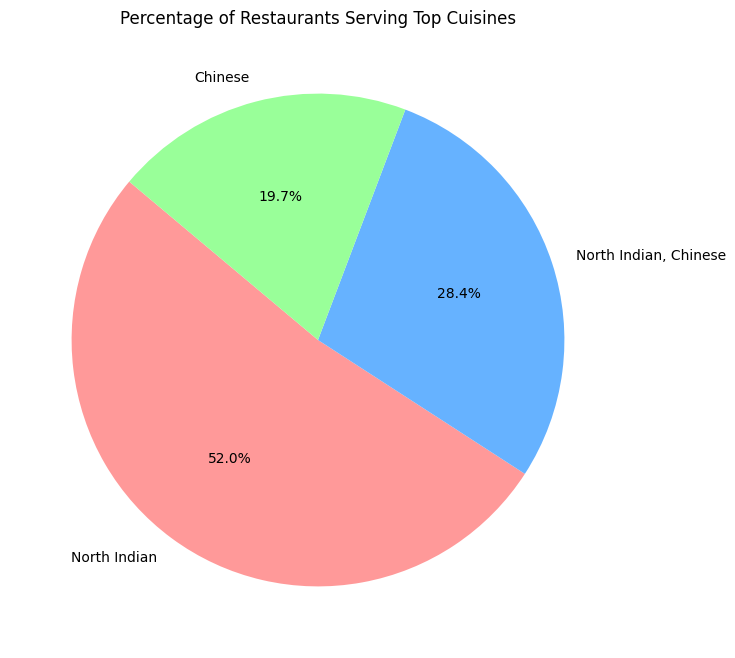


City with the highest number of restaurants: New Delhi

Average ratings per city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with the highest average rating: Inner City


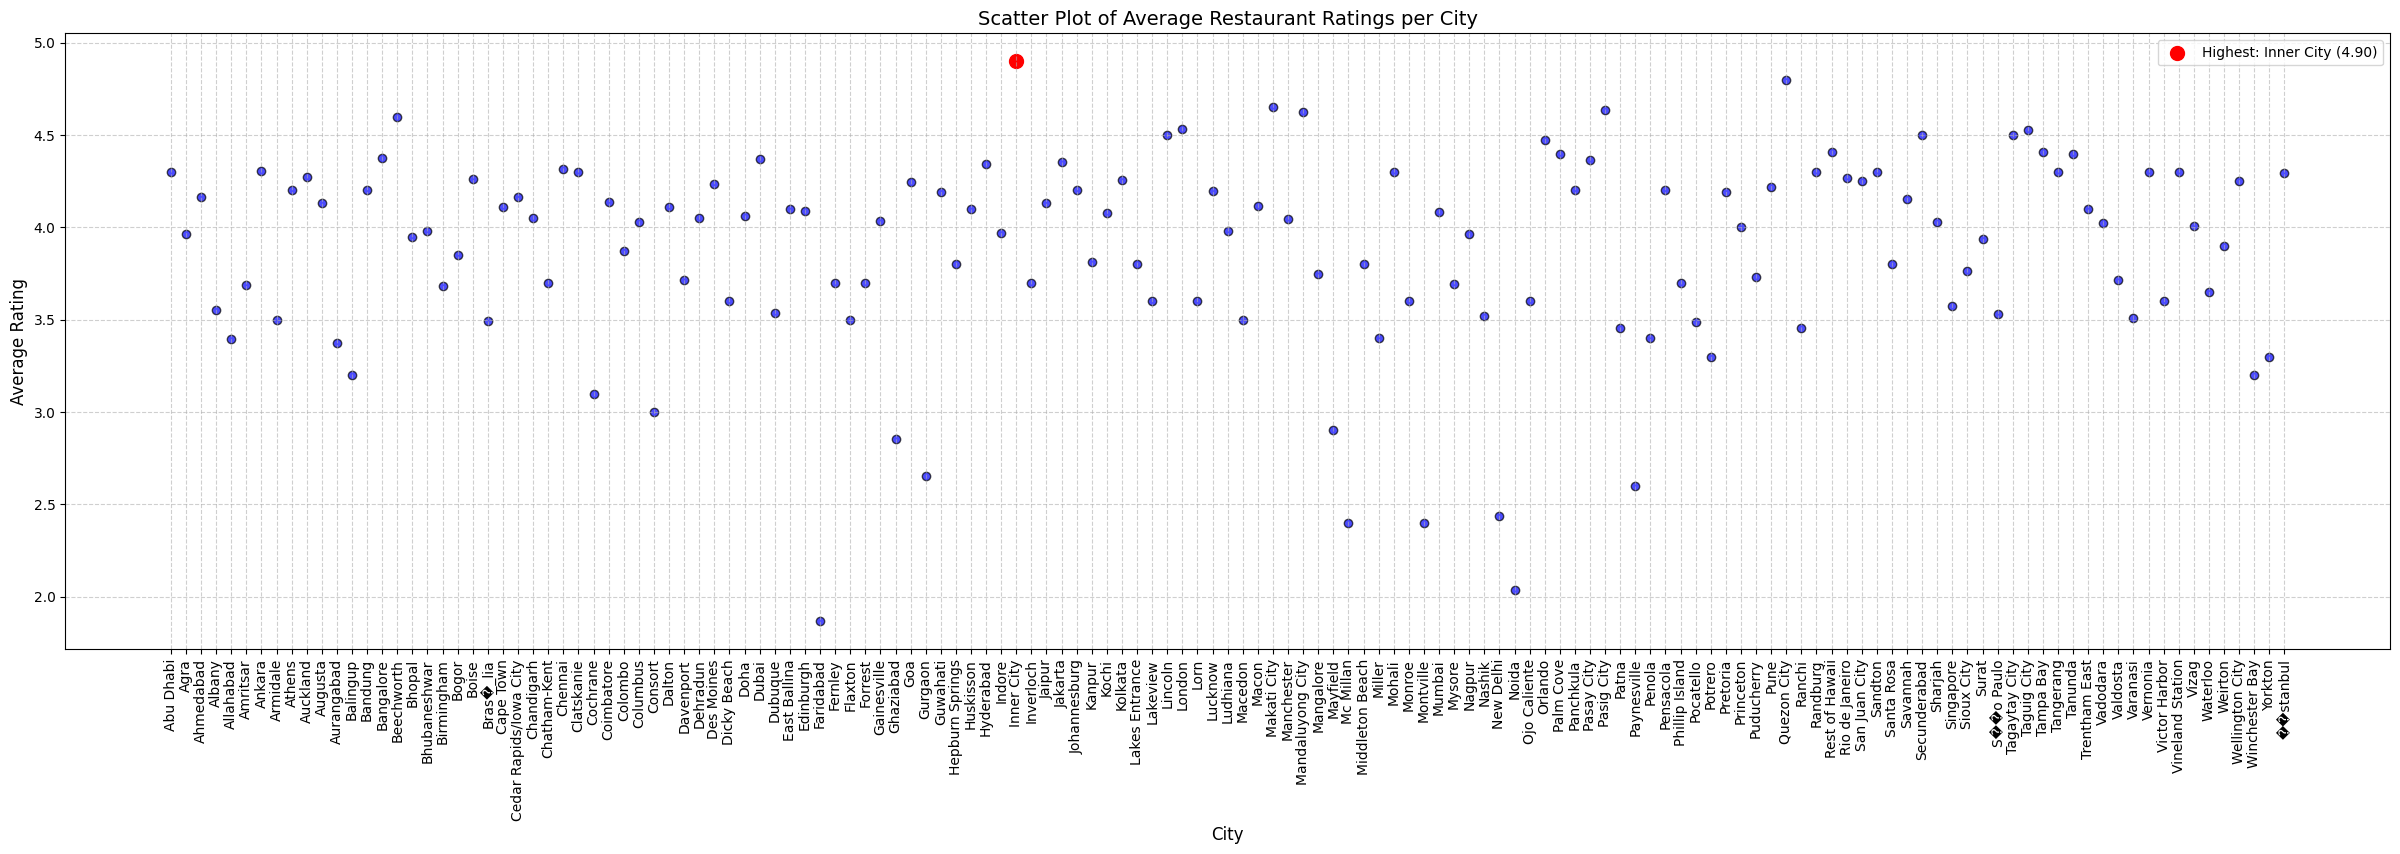

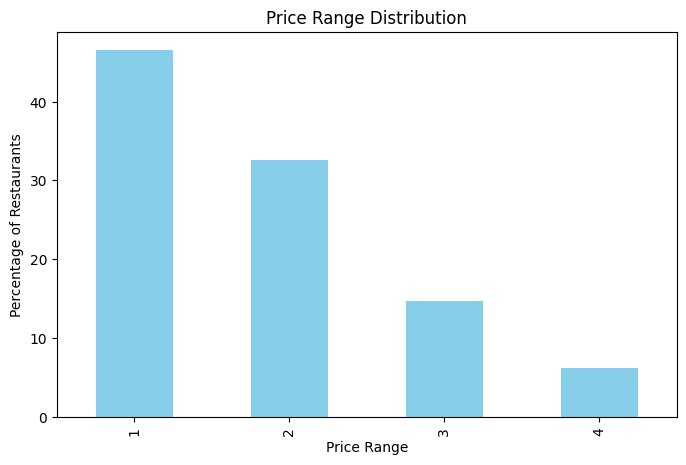


Percentage of restaurants in each price range:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64

Percentage of restaurants offering online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

Average rating of restaurants with online delivery: 3.2488372093023257
Average rating of restaurants without online delivery: 2.465295774647887


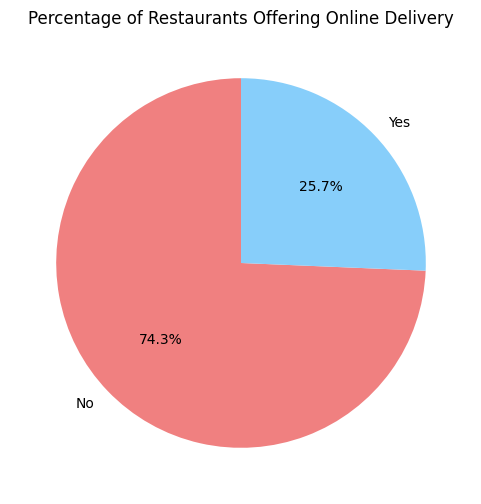

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Dataset .csv", encoding="utf-8")

# Task 1: Top Cuisines Analysis

# Count the number of restaurants for each cuisine
cuisine_counts = df['Cuisines'].value_counts()
# Select top 3 cuisines
top_3_cuisines = cuisine_counts.head(3)
# Calculate the percentage of restaurants serving each of the top cuisines
total_restaurants = df.shape[0]
percentage = (top_3_cuisines / total_restaurants) * 100

print("Top 3 Cuisines:")
print(top_3_cuisines)
print("\nPercentage of restaurants serving top cuisines:")
print(percentage)

# Pie chart visualization
plt.figure(figsize=(8, 8))
colors = ['#FF9999', '#66B2FF', '#99FF99']  # Custom colors for better visualization
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Title and display
plt.title("Percentage of Restaurants Serving Top Cuisines")
plt.show()




# Task 2: City Analysis
city_counts = df['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()


# Calculate the average rating per city
avg_ratings = df.groupby('City')['Aggregate rating'].mean()
city_with_highest_avg_rating = avg_ratings.idxmax()

print("\nCity with the highest number of restaurants:", city_with_most_restaurants)
print("\nAverage ratings per city:")
print(avg_ratings)
print("\nCity with the highest average rating:", city_with_highest_avg_rating)

# Create a scatter plot
plt.figure(figsize=(30, 8))
plt.scatter(avg_ratings.index, avg_ratings.values, color='blue', alpha=0.7, edgecolors='black')

# Highlight the highest-rated city
top_city = avg_ratings.idxmax()
top_rating = avg_ratings.max()
plt.scatter(top_city, top_rating, color='red', s=100, label=f'Highest: {top_city} ({top_rating:.2f})')

# Customize labels and title
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Scatter Plot of Average Restaurant Ratings per City", fontsize=14)
plt.xticks(rotation=90)  # Rotate city names for better visibility
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()




# Task 3: Price Range Distribution
price_counts = df['Price range'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
price_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.title("Price Range Distribution")
plt.show()

print("\nPercentage of restaurants in each price range:")
print(price_counts)




# Task 4: Online Delivery Analysis
online_delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100
avg_rating_online = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_no_online = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print("\nPercentage of restaurants offering online delivery:")
print(online_delivery_counts)
print("\nAverage rating of restaurants with online delivery:", avg_rating_online)
print("Average rating of restaurants without online delivery:", avg_rating_no_online)

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(online_delivery_counts, labels=online_delivery_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.show()

